<center><h1>Aditya_Subramanian_HW1</h1></center>
<center><h3>Github Username: ckgk5hz_usc</h3></center>
<center><h3>USC ID: 5856-1656-43</h3></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


Get the Vertebral Column Data Set

Here we are using the column_2C_weka.arff dataset by loading it via scipy library

In [2]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('../data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


### (b) Pre-Processing and Exploratory Data Analysis

#### Converting NO=0 and AB=1.

In [3]:
df['class'] = df['class'].apply(lambda x: 0 if x == b'Normal' else 1)
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


#### i. Scatterplots

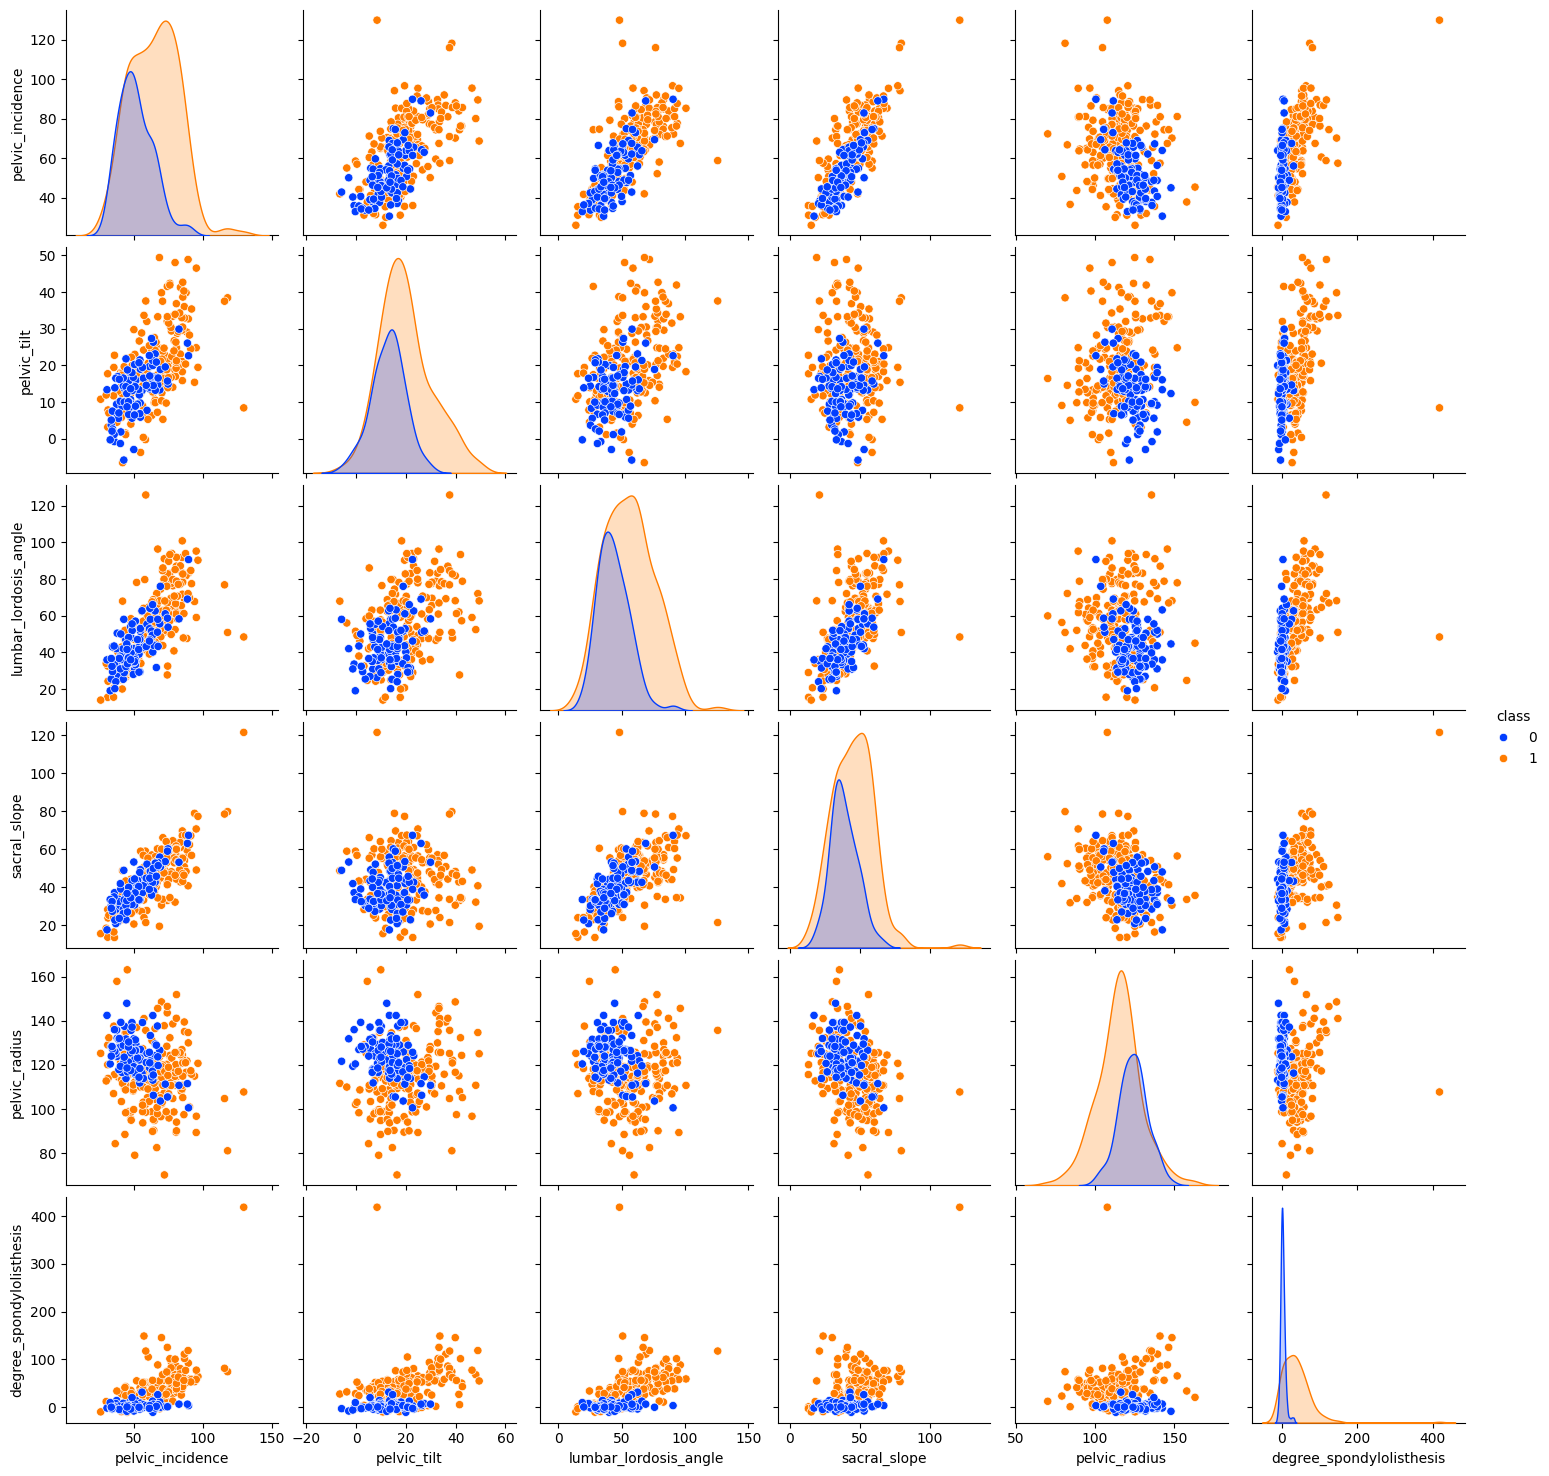

In [4]:
sns.pairplot(df, hue="class", diag_kind="auto", palette="bright")
plt.show()

#### ii. Boxplots

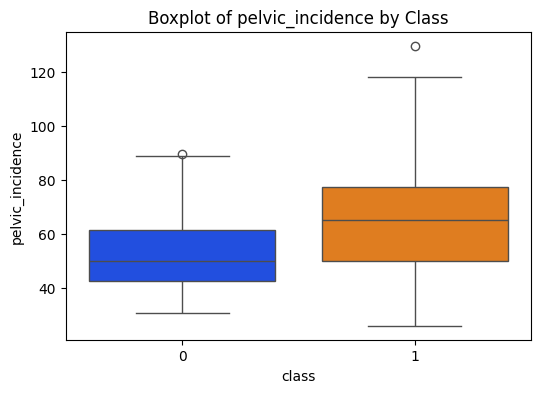

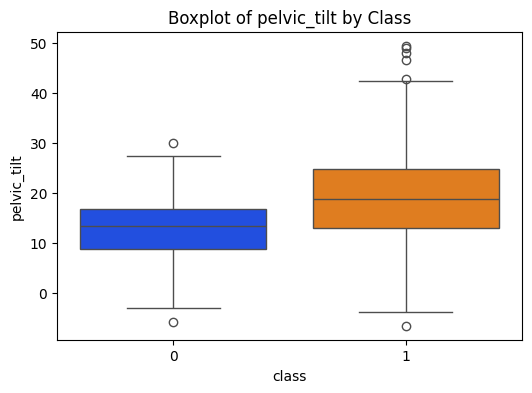

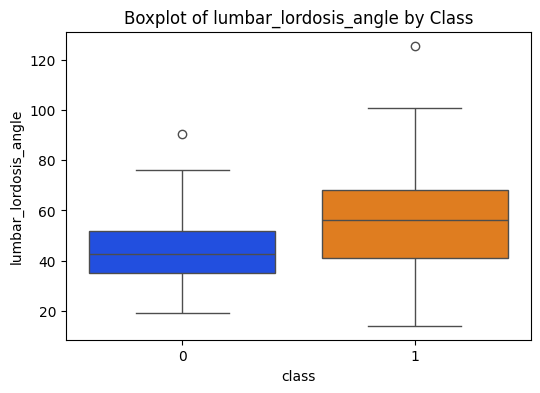

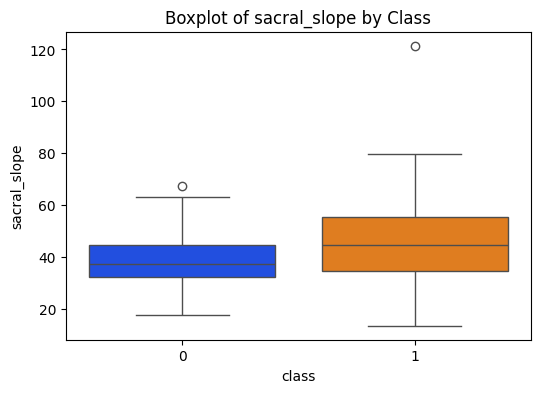

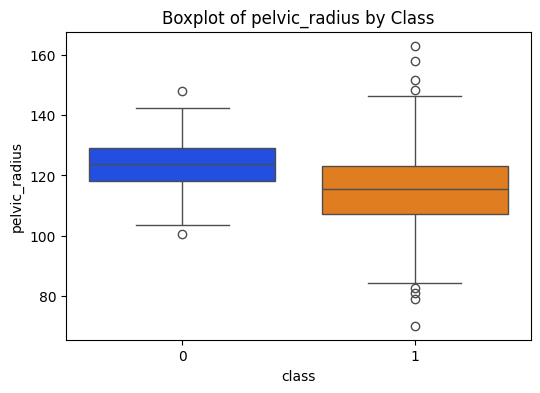

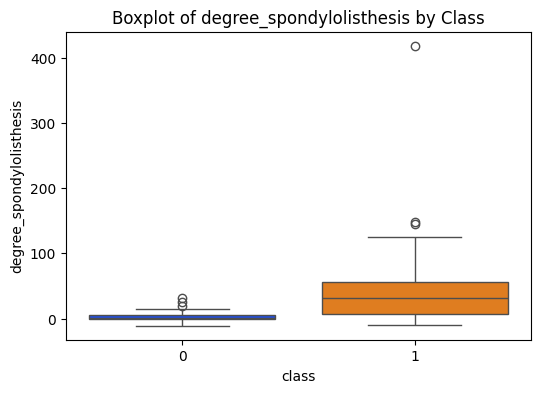

In [5]:
for col in df.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="class", y=col, hue="class", data=df, palette="bright", legend=False)
    plt.title(f"Boxplot of {col} by Class")
    plt.show()

#### iii. Split Data Set

Did .sample() for randomization

In [6]:
class_0_train = df[df['class'] == 0].iloc[:70]
class_1_train = df[df['class'] == 1].iloc[:140]

class_0_test = df[df['class'] == 0].iloc[71:]
class_1_test = df[df['class'] == 1].iloc[141:]

train_df = pd.concat([class_0_train, class_1_train]).sample(frac=1, random_state=77)
test_df = pd.concat([class_0_test, class_1_test]).sample(frac=1, random_state=77)

X_train = train_df.drop('class', axis=1)
y_train = train_df['class']
X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

### (c) Classification

#### i. Euclidean Metric

**Intuition behind KNN:**
The k-Nearest Neighbors algorithm is based on the idea that data points with similar features are likely to belong to the same class. To classify a new point, the algorithm looks at the *k* closest training samples (measured by a distance metric such as Euclidean or Manhattan) and assigns the label that is most common among them. Smaller values of *k* capture local patterns but can be noisy, while larger values of *k* provide smoother decision boundaries but may overlook finer details.

In [7]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_neighbors(X_train, y_train, X_test, k, distance_metric):
    predictions = []
    for i in range(X_test.shape[0]):
        distances = []
        for j in range(X_train.shape[0]):
            if X_test.shape == X_train.shape and i == j:
                continue
            dist = distance_metric(X_test.iloc[i], X_train.iloc[j])
            distances.append((dist, y_train.iloc[j]))
        distances.sort(key=lambda dist: dist[0])
        neighbors = [distances[m][1] for m in range(k)]
        class_votes = {0: 0, 1: 0}
        for neighbor in neighbors:
            class_votes[neighbor] += 1
        pred = max(class_votes, key=class_votes.get)
        predictions.append(pred)
    return predictions

#### ii. Test Data

In [8]:
k_values = list(range(208, 0, -1)) + [1]

train_errors = []
test_errors = []

for k in k_values:
    y_train_pred = knn_neighbors(X_train, y_train, X_train, k, euclidean_distance)
    y_test_pred = knn_neighbors(X_train, y_train, X_test, k, euclidean_distance)
    
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)


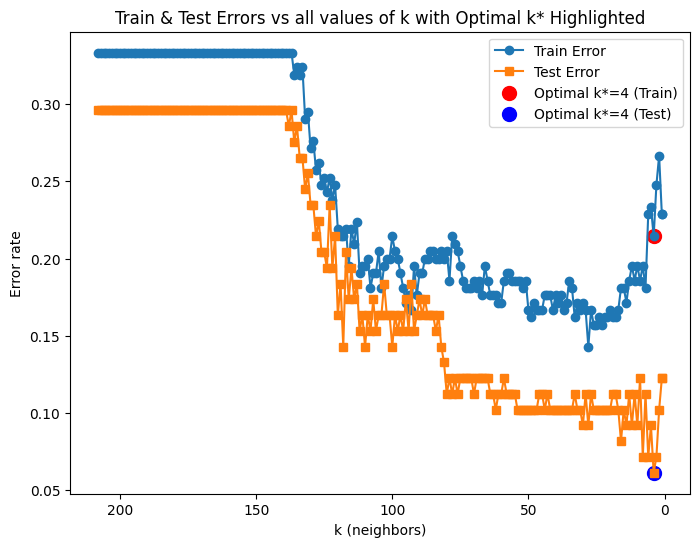

In [9]:
# Plot for k*
optimal_k = k_values[np.argmin(test_errors)]
optimal_index = k_values.index(optimal_k)
optimal_train_error = train_errors[optimal_index]
optimal_test_error = test_errors[optimal_index]
plt.figure(figsize=(8,6))
plt.plot(k_values, train_errors, label="Train Error", marker="o")
plt.plot(k_values, test_errors, label="Test Error", marker="s")
plt.scatter([optimal_k], [optimal_train_error], color='red', s=100, label=f'Optimal k*={optimal_k} (Train)')
plt.scatter([optimal_k], [optimal_test_error], color='blue', s=100, label=f'Optimal k*={optimal_k} (Test)')
plt.xlabel("k (neighbors)")
plt.ylabel("Error rate")
plt.title("Train & Test Errors vs all values of k with Optimal k* Highlighted")
plt.legend()
plt.gca().invert_xaxis()  # because k is descending
plt.show()

#### Confusion Matrix, True Positive Rate, True Negative Rate, Precision and F1-Score for k=4

In [10]:
y_test_pred_optimal = knn_neighbors(X_train, y_train, X_test, optimal_k, euclidean_distance)
cm = confusion_matrix(y_test, y_test_pred_optimal)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
precision = precision_score(y_test, y_test_pred_optimal, zero_division=0)
f1 = f1_score(y_test, y_test_pred_optimal, zero_division=0)

print(f"Confusion Matrix for k={optimal_k}:\n{cm}")
print(f"True Positive Rate (TPR): {tpr:.4f}")
print(f"True Negative Rate (TNR): {tnr:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")

Confusion Matrix for k=4:
[[24  5]
 [ 1 68]]
True Positive Rate (TPR): 0.9855
True Negative Rate (TNR): 0.8276
Precision: 0.9315
F1-Score: 0.9577


#### iii. Learning Curve

In [11]:
best_test_errors = []
N_values = list(range(10, 211, 10))

for N in N_values:
    n0 = N // 3
    n1 = N - n0
    
    subset = pd.concat([class_0_train.iloc[:n0],
                        class_1_train.iloc[:n1]])
    
    X_sub = subset.drop("class", axis=1)
    y_sub = subset["class"]
    
    k_values = list(range(1, N+1, 5))
    
    test_errors = []
    for k in k_values:
        y_pred = knn_neighbors(X_sub, y_sub, X_test, k, euclidean_distance)
        err = 1 - accuracy_score(y_test, y_pred)
        test_errors.append(err)
    
    best_test_errors.append(min(test_errors))


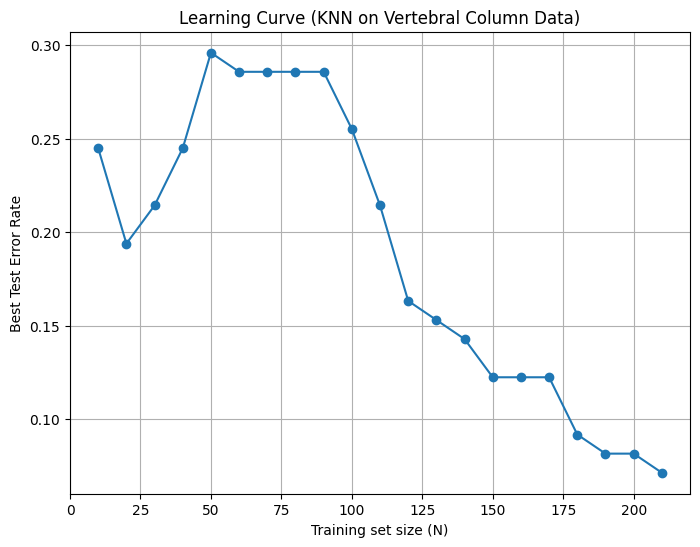

In [12]:
# Plot Learning Curve
plt.figure(figsize=(8,6))
plt.plot(N_values, best_test_errors, marker="o")
plt.xlabel("Training set size (N)")
plt.ylabel("Best Test Error Rate")
plt.title("Learning Curve (KNN on Vertebral Column Data)")
plt.grid(True)
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

In [13]:
def minkowski_distance(a, b, p=2):
    return np.sum(np.abs(a - b) ** p) ** (1/p)

##### A. Manhattan Distance with p = 1.

In [14]:
manhattan_test_errors = []
manhattan_train_errors = []

for k in k_values:
    y_test_pred = knn_neighbors(X_train, y_train, X_test, k, 
                                lambda a,b: minkowski_distance(a,b,p=1))
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    manhattan_test_errors.append(test_error)
    manhattan_train_errors.append(1 - accuracy_score(y_train, 
                                                     knn_neighbors(X_train, y_train, X_train, k, 
                                                                   lambda a,b: minkowski_distance(a,b,p=1))))

# Best k* for Manhattan
best_idx_man = np.argmin(manhattan_test_errors)
k_star_man = k_values[best_idx_man]
best_err_man = manhattan_test_errors[best_idx_man]
best_err_man_train = manhattan_train_errors[best_idx_man]

print("Manhattan Distance Results:")
print("Best k* =", k_star_man)
print("Test Error =", best_err_man)


Manhattan Distance Results:
Best k* = 11
Test Error = 0.10204081632653061


In [15]:
results = pd.DataFrame({
    "Metric": ["Euclidean (p=2)", "Manhattan (p=1)"],
    "Best k*": [optimal_k, k_star_man],
    "Test Error": [optimal_test_error, best_err_man],
    "Train Error": [optimal_train_error, best_err_man_train]
})

print(results)

            Metric  Best k*  Test Error  Train Error
0  Euclidean (p=2)        4    0.061224     0.214286
1  Manhattan (p=1)       11    0.102041     0.190476


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [16]:
# grid of log10(p)
log10_vals = np.arange(0.1, 1.01, 0.1)
p_vals = 10 ** log10_vals

log10_errors = []
log10_train_errors = []
for p, logp in zip(p_vals, log10_vals):
    # use the Manhattan-optimal k (k_star_man) to evaluate this p
    y_pred = knn_neighbors(
        X_train, y_train, X_test, k_star_man,
        lambda a, b: minkowski_distance(a, b, p=p)
    )
    err = 1 - accuracy_score(y_test, y_pred)
    log10_errors.append(err)
    log10_train_errors.append(1 - accuracy_score(y_train, 
                                               knn_neighbors(X_train, y_train, X_train, k_star_man,
                                                             lambda a, b: minkowski_distance(a, b, p=p))))
    print(f"log10(p)={logp:.1f}, p={p:.4f}, test_error={err:.4f}, train_error={log10_train_errors[-1]:.4f}")

# pick best
best_idx = int(np.argmin(log10_errors))
best_log10_p = log10_vals[best_idx]
best_p = p_vals[best_idx]
best_err = log10_errors[best_idx]
best_train_err = log10_train_errors[best_idx]

print("\nBest log10(p):", best_log10_p)
print("Corresponding p:", best_p)
print("Test error at this p:", best_err)

results_minkowski = pd.DataFrame([{
    "Metric": f"Minkowski (optimal p = {best_p:.4f})",
    "Best k*": f"log10(p): {best_log10_p}, k*: {k_star_man}",
    "Test Error": best_err,
    "Train Error": best_train_err
}])
results = pd.concat([results, results_minkowski], ignore_index=True)

print(results)

log10(p)=0.1, p=1.2589, test_error=0.1020, train_error=0.1619
log10(p)=0.2, p=1.5849, test_error=0.1020, train_error=0.1810
log10(p)=0.3, p=1.9953, test_error=0.1122, train_error=0.1857
log10(p)=0.4, p=2.5119, test_error=0.1122, train_error=0.1810
log10(p)=0.5, p=3.1623, test_error=0.1122, train_error=0.2000
log10(p)=0.6, p=3.9811, test_error=0.1122, train_error=0.2143
log10(p)=0.7, p=5.0119, test_error=0.1122, train_error=0.2143
log10(p)=0.8, p=6.3096, test_error=0.1020, train_error=0.2095
log10(p)=0.9, p=7.9433, test_error=0.1020, train_error=0.2095
log10(p)=1.0, p=10.0000, test_error=0.1020, train_error=0.2095

Best log10(p): 0.1
Corresponding p: 1.2589254117941673
Test error at this p: 0.10204081632653061
                           Metric                Best k*  Test Error  \
0                 Euclidean (p=2)                      4    0.061224   
1                 Manhattan (p=1)                     11    0.102041   
2  Minkowski (optimal p = 1.2589)  log10(p): 0.1, k*: 11    0.102

##### C. Chebyshev Distance With p -> infinity.

In [17]:
def chebyshev_distance(a, b):
    return minkowski_distance(a, b, p=np.inf)

y_test_pred = knn_neighbors(X_train, y_train, X_test, k_star_man, chebyshev_distance)
err_cheb = 1 - accuracy_score(y_test, y_test_pred)

err_cheb_train = 1 - accuracy_score(y_train, 
                                   knn_neighbors(X_train, y_train, X_train, k_star_man, chebyshev_distance))

print("Chebyshev Distance Results:")
print("Best k* (same as Manhattan) =", k_star_man)
print("Test Error =", err_cheb)

# Add to results table
results_cheb = pd.DataFrame([{
    "Metric": "Chebyshev (p = ∞)",
    "Best k*": k_star_man,
    "Test Error": err_cheb,
    "Train Error": err_cheb_train
}])

results = pd.concat([results, results_cheb], ignore_index=True)
print(results)

Chebyshev Distance Results:
Best k* (same as Manhattan) = 11
Test Error = 0.29591836734693877
                           Metric                Best k*  Test Error  \
0                 Euclidean (p=2)                      4    0.061224   
1                 Manhattan (p=1)                     11    0.102041   
2  Minkowski (optimal p = 1.2589)  log10(p): 0.1, k*: 11    0.102041   
3               Chebyshev (p = ∞)                     11    0.295918   

   Train Error  
0     0.214286  
1     0.190476  
2     0.161905  
3     0.333333  


#### ii. Mahalanobis Distance.

In [18]:
# using covariance matrix and pseudoinverse matrix via numpy
cov_matrix = np.cov(X_train.T)
cov_inv = np.linalg.pinv(cov_matrix)

def mahalanobis_distance(a, b):
    diff = (a - b).values
    return np.sqrt(diff.T @ cov_inv @ diff)

y_test_pred = knn_neighbors(X_train, y_train, X_test, k_star_man, mahalanobis_distance)
err_maha = 1 - accuracy_score(y_test, y_test_pred)

err_maha_train = 1 - accuracy_score(y_train, 
                                   knn_neighbors(X_train, y_train, X_train, k_star_man, mahalanobis_distance))

print("Mahalanobis Distance Results:")
print("Best k* (same as Manhattan) =", k_star_man)
print("Test Error =", err_maha)

# Add to results table
results_maha = pd.DataFrame([{
    "Metric": "Mahalanobis",
    "Best k*": k_star_man,
    "Test Error": err_maha,
    "Train Error": err_maha_train
}])

results = pd.concat([results, results_maha], ignore_index=True)
print(results)

Mahalanobis Distance Results:
Best k* (same as Manhattan) = 11
Test Error = 0.173469387755102
                           Metric                Best k*  Test Error  \
0                 Euclidean (p=2)                      4    0.061224   
1                 Manhattan (p=1)                     11    0.102041   
2  Minkowski (optimal p = 1.2589)  log10(p): 0.1, k*: 11    0.102041   
3               Chebyshev (p = ∞)                     11    0.295918   
4                     Mahalanobis                     11    0.173469   

   Train Error  
0     0.214286  
1     0.190476  
2     0.161905  
3     0.333333  
4     0.204762  


### (e) Weighted Decision

In [19]:
def knn_weighted_neighbors(X_train, y_train, X_test, k, distance_metric, eps=1e-8):
    predictions = []
    for i in range(X_test.shape[0]):
        distances = []
        for j in range(X_train.shape[0]):
            dist = distance_metric(X_test.iloc[i], X_train.iloc[j])
            distances.append((dist, y_train.iloc[j]))
        distances.sort(key=lambda d: d[0])
        neighbors = distances[:k]
        
        # weighted votes: weight = 1 / (distance + eps (to avoid div by zero))
        class_weights = {0: 0.0, 1: 0.0}
        for dist, label in neighbors:
            class_weights[label] += 1.0 / (dist + eps)
        
        pred = max(class_weights, key=class_weights.get)
        predictions.append(pred)
    return predictions

In [20]:
k_values = list(range(1, 197, 5))

def best_weighted_knn(X_train, y_train, X_test, y_test, distance_metric, name):
    errors = []
    weighted_train_errors = []
    for k in k_values:
        y_pred = knn_weighted_neighbors(X_train, y_train, X_test, k, distance_metric)
        err = 1 - accuracy_score(y_test, y_pred)
        errors.append(err)
        weighted_train_errors.append(1 - accuracy_score(y_train, 
                                                       knn_weighted_neighbors(X_train, y_train, X_train, k, distance_metric)))
        print(f"{name}, k={k}, test_error={err:.4f}, train_error={weighted_train_errors[-1]:.4f}")
    best_idx = int(np.argmin(errors))
    return {
        "Metric": name,
        "Best k*": k_values[best_idx],
        "Test Error": errors[best_idx],
        "Train Error": weighted_train_errors[best_idx]
    }

results_weighted = []

# Euclidean
results_weighted.append(best_weighted_knn(X_train, y_train, X_test, y_test, euclidean_distance, "Euclidean (weighted)"))

# Manhattan
results_weighted.append(best_weighted_knn(X_train, y_train, X_test, y_test, lambda a,b: minkowski_distance(a,b,p=1), "Manhattan (weighted)"))

# Chebyshev
results_weighted.append(best_weighted_knn(X_train, y_train, X_test, y_test, chebyshev_distance, "Chebyshev (weighted)"))

# Mahalanobis
results_weighted.append(best_weighted_knn(X_train, y_train, X_test, y_test, mahalanobis_distance, "Mahalanobis (weighted)"))

df_weighted = pd.DataFrame(results_weighted)
print(df_weighted)

Euclidean (weighted), k=1, test_error=0.1224, train_error=0.0000
Euclidean (weighted), k=6, test_error=0.0918, train_error=0.0000
Euclidean (weighted), k=11, test_error=0.1122, train_error=0.0000
Euclidean (weighted), k=16, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=21, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=26, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=31, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=36, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=41, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=46, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=51, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=56, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=61, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=66, test_error=0.1020, train_error=0.0000
Euclidean (weighted), k=71, test_error=0.1020, train_error=0.0000
Euclidean (w

### (f) Training Error Rate

In [21]:
all_results = pd.concat([results, df_weighted], ignore_index=True)

min_train_error = all_results["Train Error"].min()
best_row = all_results.loc[all_results["Train Error"].idxmin()]

print("\nLowest Training Error Achieved:")
print(best_row)


Lowest Training Error Achieved:
Metric         Euclidean (weighted)
Best k*                           6
Test Error                 0.091837
Train Error                     0.0
Name: 5, dtype: object


## References

* Vertebral Column dataset (UCI Machine Learning Repository):
  [https://archive.ics.uci.edu/ml/datasets/Vertebral+Column](https://archive.ics.uci.edu/ml/datasets/Vertebral+Column)

* NumPy documentation:
  [https://numpy.org/doc/](https://numpy.org/doc/)

* pandas documentation:
  [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)

* Matplotlib documentation:
  [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)

* Seaborn documentation:
  [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

* SciPy documentation (`arff` loader):
  [https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html)

### Distance Metrics

* Euclidean distance:
  [https://en.wikipedia.org/wiki/Euclidean\_distance](https://en.wikipedia.org/wiki/Euclidean_distance)

* Manhattan distance:
  [https://en.wikipedia.org/wiki/Taxicab\_geometry](https://en.wikipedia.org/wiki/Taxicab_geometry)

* Minkowski distance:
  [https://en.wikipedia.org/wiki/Minkowski\_distance](https://en.wikipedia.org/wiki/Minkowski_distance)

* Chebyshev distance:
  [https://en.wikipedia.org/wiki/Chebyshev\_distance](https://en.wikipedia.org/wiki/Chebyshev_distance)

* Mahalanobis distance:
  [https://en.wikipedia.org/wiki/Mahalanobis\_distance](https://en.wikipedia.org/wiki/Mahalanobis_distance)

### KNN Algorithm

* K-Nearest Neighbors (intuition & explanation):
  [https://en.wikipedia.org/wiki/K-nearest\_neighbors\_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)